In [1]:
import numpy as np
import random, math, copy
import matplotlib.pyplot as plt
from solver import p_prob_var_solver
from tester import tester
from utils import sinusoid, zero_mean, squared_exponential_kernel
%matplotlib inline

In [2]:
x, y = np.meshgrid(np.linspace(0, 1, 31), np.linspace(0, 2, 61))
x, y = np.reshape(x, (-1, 1)), np.reshape(y, (-1, 1))
sample_space = list(np.hstack((x, y)))
k = squared_exponential_kernel(math.exp(1), math.exp(-1.5))

In [ ]:
beta = [0.2 * i for i in range(6)]

In [ ]:
tester_beta = tester(sample_num=50, iter_num=5)

In [ ]:
solver = []
for i in range(len(beta)):
    solver.append(
        p_prob_var_solver(
            sample_space=sample_space,
            threshold=1,
            sigma=math.exp(-1),
            function=sinusoid,
            kernel=k,
            mean=zero_mean,
            epsilon=1e-12,
            beta=beta[i],
            dropout=0.0))
labels = ['beta = %.1f' % x for x in beta]
colors = ['r', 'g', 'b', 'c', 'm', 'y']

In [ ]:
res = []
for i in range(len(beta)):
    tester_beta.clear()
    tester_beta.run(solver[i])
    res.append(tester_beta.get_error_bar_param())

In [ ]:
plt.figure()
for i, r in enumerate(res):
    x, t, err = r
    plt.errorbar(x, t, err, label=labels[i], color=colors[i], capsize=3)
    plt.legend()
plt.xlabel('sample number')
plt.ylabel('F1 score')
plt.savefig('beta_f1.png', dpi=600)

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(len(beta)):
    plt.subplot(2, 3, i + 1)    
    # plot contour
    X,Y = np.meshgrid(np.linspace(0, 1, 31), np.linspace(0, 2, 61))
    Z = np.vectorize(math.sin)(10*X) + np.vectorize(math.cos)(4*Y) - np.vectorize(math.cos)(3*X*Y)
    contour = plt.contour(X,Y,Z,[1],colors='k')
    x = [p[0] for p in solver[i].x_hist]
    y = [p[1] for p in solver[i].x_hist]
    plt.scatter(x, y)
    plt.title(labels[i])
plt.tight_layout()
plt.savefig('beta_location.png', dpi=600)

---

In [16]:
beta = [0.2 * i for i in range(3)]
tester_beta = tester(sample_num=100, iter_num=5, hist=False)
solver = []
for i in range(len(beta)):
    solver.append(
        p_prob_var_solver(
            sample_space=sample_space,
            threshold=1,
            sigma=math.exp(-1),
            function=sinusoid,
            kernel=k,
            mean=zero_mean,
            epsilon=1e-12,
            beta=beta[i],
            dropout=0.0))
labels = ['beta = %.1f' % x for x in beta]
colors = ['r', 'g', 'b', 'c', 'm', 'y']

In [17]:
res = []
for i in range(len(beta)):
    tester_beta.clear()
    tester_beta.run(solver[i])
    res.append(tester_beta.F1_list)

Text(0,0.5,'F1 score')

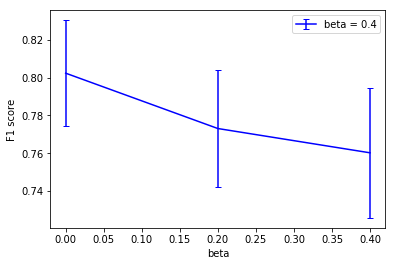

In [19]:
res_array = np.array(res)
t = np.mean(res_array, axis=1)
err = np.std(res_array, axis=1)
plt.errorbar(beta, t, err, label=labels[i], color=colors[i], capsize=3)
plt.legend()
plt.xlabel('beta')
plt.ylabel('F1 score')

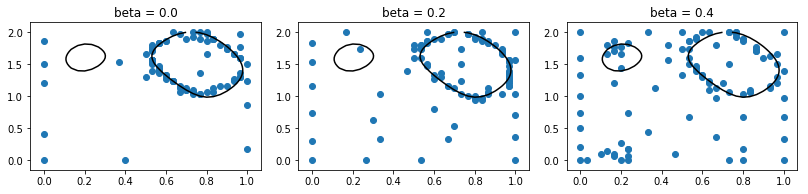

In [20]:
labels = ['beta = %.1f' % x for x in beta]
plt.figure(figsize=(15, 5))
for i in range(len(beta)):
    plt.subplot(2, 4, i + 1)    
    # plot contour
    X,Y = np.meshgrid(np.linspace(0, 1, 31), np.linspace(0, 2, 61))
    Z = np.vectorize(math.sin)(10*X) + np.vectorize(math.cos)(4*Y) - np.vectorize(math.cos)(3*X*Y)
    contour = plt.contour(X,Y,Z,[1],colors='k')
    x = [p[0] for p in solver[i].x_hist]
    y = [p[1] for p in solver[i].x_hist]
    plt.scatter(x, y)
    plt.title(labels[i])
plt.tight_layout()
plt.savefig('drop_location_100.png', dpi=600)

[0, 1, 0, 2]

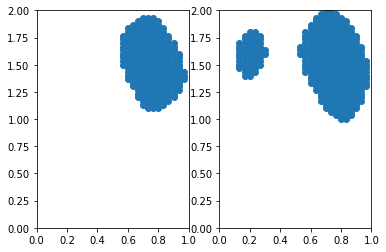

In [22]:
super_level_set, left_set = solver[0].get_super_level_set(1.96)
gt_set = solver[0].get_gt_set()
plt.subplot(1, 2, 1)
x = [p[0] for p in super_level_set]
y = [p[1] for p in super_level_set]
plt.scatter(x, y)
plt.axis([0, 1, 0, 2])
plt.subplot(1, 2, 2)
x = [p[0] for p in gt_set]
y = [p[1] for p in gt_set]
plt.scatter(x, y)
plt.axis([0, 1, 0, 2])